In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('top_insta_influencers_data.csv')


In [9]:
# Copy for cleaning
df_clean = df.copy()

# Replace 'k', 'm', 'b', '%' with proper values
replace_map = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
columns_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate',
                      'new_post_avg_like', 'total_likes']

df_clean[columns_to_convert] = df_clean[columns_to_convert].replace(replace_map, regex=True).astype(float)

# Fill missing values
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    else:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Drop duplicates
df_clean.drop_duplicates(inplace=True)

# Convert to integer for selected columns
df_clean['followers'] = df_clean['followers'].astype(int)
df_clean['posts'] = df_clean['posts'].astype(int)
df_clean['total_likes'] = df_clean['total_likes'].astype(int)


/tmp/ipython-input-9-395973120.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-9-395973120.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

       influence_score     followers     avg_likes  60_day_eng_rate  \
count       200.000000  2.000000e+02  2.000000e+02       200.000000   
mean         81.820000  7.740950e+07  1.787104e+06         1.896900   
std           8.878159  7.368727e+07  2.193359e+06         3.322129   
min          22.000000  3.280000e+07  6.510000e+04         0.010000   
25%          80.000000  4.000000e+07  5.044000e+05         0.410000   
50%          84.000000  5.005000e+07  1.100000e+06         0.880000   
75%          86.000000  6.890000e+07  2.100000e+06         2.032500   
max          93.000000  4.758000e+08  1.540000e+07        26.410000   

       new_post_avg_like  
count       2.000000e+02  
mean        1.208132e+06  
std         1.858322e+06  
min         0.000000e+00  
25%         1.957500e+05  
50%         5.321500e+05  
75%         1.325000e+06  
max         1.260000e+07  


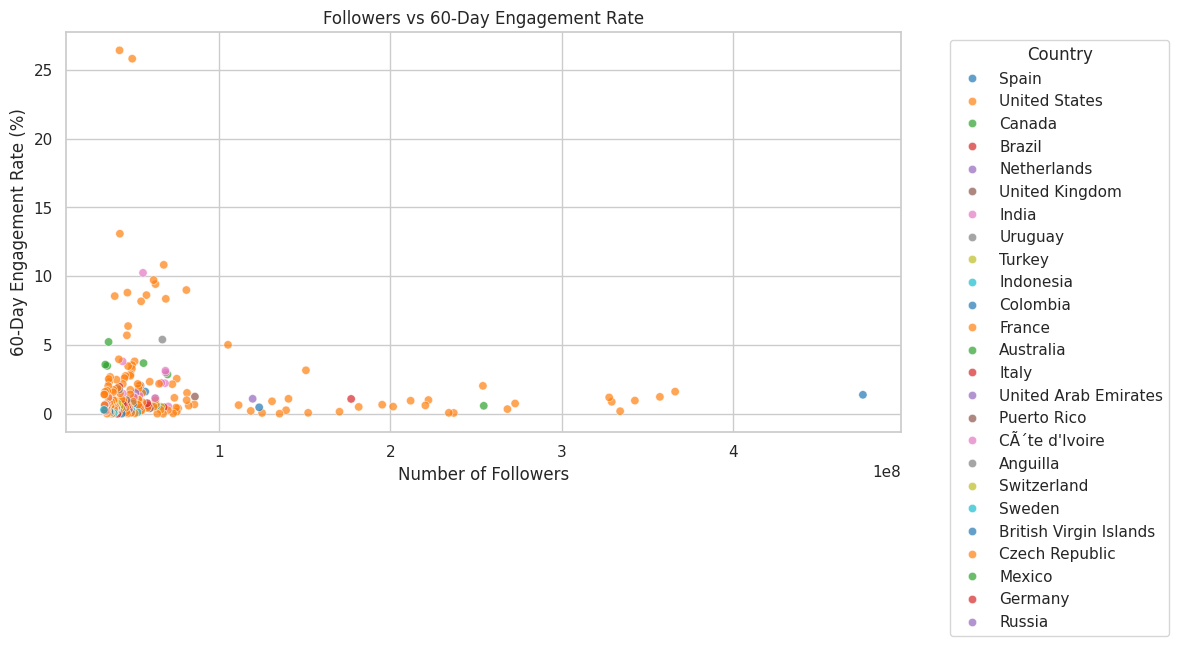

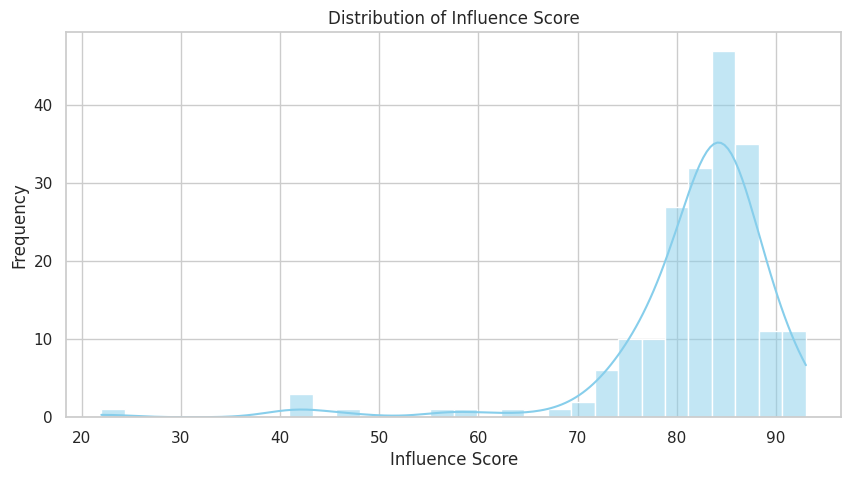

/tmp/ipython-input-11-52947466.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


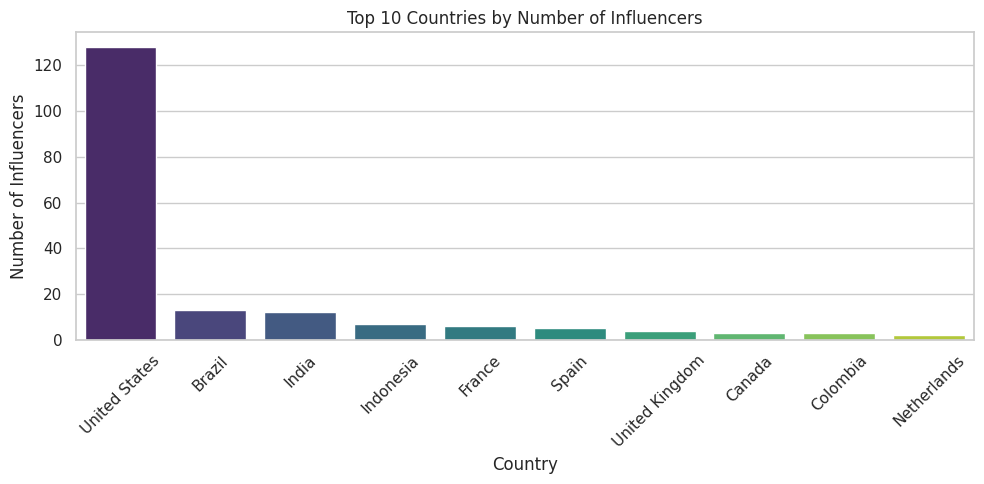

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Summary statistics
print(df_clean[['influence_score', 'followers', 'avg_likes',
                '60_day_eng_rate', 'new_post_avg_like']].describe())

# Followers vs Engagement
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='followers', y='60_day_eng_rate',
                hue='country', alpha=0.7, palette='tab10')
plt.title('Followers vs 60-Day Engagement Rate')
plt.xlabel('Number of Followers')
plt.ylabel('60-Day Engagement Rate (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Distribution of Influence Score
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['influence_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.show()

# Top 10 Countries
top_countries = df_clean['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Feature Engineering
df_clean['like_follower_ratio'] = df_clean['total_likes'] / df_clean['followers']
df_clean['post_follower_ratio'] = df_clean['posts'] / df_clean['followers']
df_clean['avg_likes_ratio'] = df_clean['avg_likes'] / df_clean['followers']

# Display first 5 rows to verify
df_clean[['channel_info', 'followers', 'total_likes', 'like_follower_ratio',
          'post_follower_ratio', 'avg_likes_ratio']].head()


,channel_info,followers,total_likes,like_follower_ratio,post_follower_ratio,avg_likes_ratio
0,cristiano,475800000,29000000000,60.949979,0.000007,0.018285
1,kyliejenner,366200000,57400000000,156.744948,0.000019,0.022665
2,leomessi,357300000,6000000000,16.792611,0.000002,0.019032
3,selenagomez,342700000,11500000000,33.557047,0.000005,0.018092
4,therock,334100000,12500000000,37.413948,0.000020,0.005687


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df_clean[['followers', 'avg_likes', '60_day_eng_rate',
              'new_post_avg_like', 'like_follower_ratio',
              'post_follower_ratio']]
y = df_clean['influence_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Trained!")
print(f"📉 Mean Squared Error: {mse}")
print(f"📈 R² Score: {r2}")


✅ Model Trained!
📉 Mean Squared Error: 171.57413
📈 R² Score: -0.014814953920542884


/tmp/ipython-input-23-3746135652.py:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


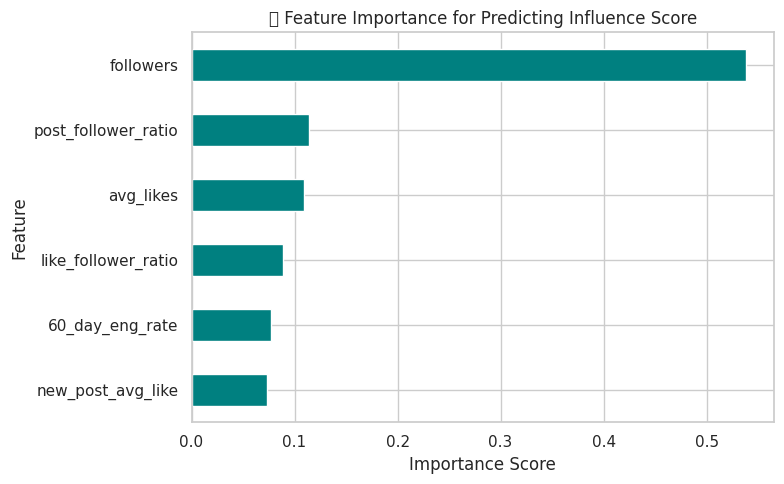

In [23]:
# Get feature importance from the model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot
plt.figure(figsize=(8, 5))
feature_importances.sort_values().plot(kind='barh', color='teal')
plt.title("🔍 Feature Importance for Predicting Influence Score")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-946064649.py:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


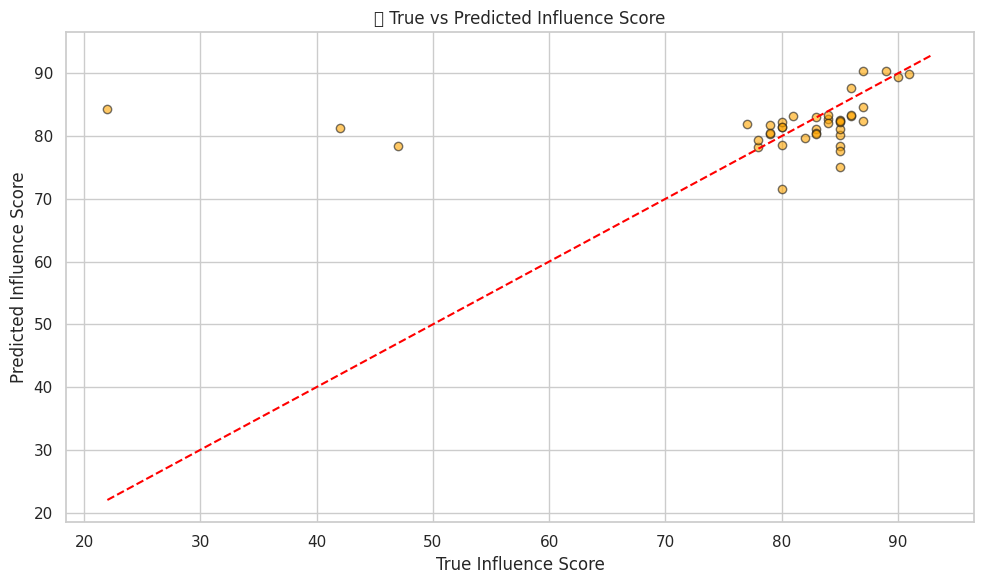

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('🎯 True vs Predicted Influence Score')
plt.tight_layout()
plt.show()


In [25]:
# 1. High Engagement Rate Influencers (above 2.5%)
high_engagement = df_clean[df_clean['60_day_eng_rate'] > 2.5]

# 2. Micro-influencers: Less than 2 million followers, high engagement
micro_influencers = df_clean[(df_clean['followers'] < 2e6) &
                             (df_clean['60_day_eng_rate'] > 2.5)]

# 3. Growth Indicators: New post avg likes > avg likes
growing_influencers = df_clean[df_clean['new_post_avg_like'] > df_clean['avg_likes'] * 1.1]

print("📈 High Engagement Influencers (>2.5%):")
print(high_engagement[['channel_info', 'followers', '60_day_eng_rate']].head())

print("\n📉 High Engagement Micro-Influencers (<2M followers):")
print(micro_influencers[['channel_info', 'followers', '60_day_eng_rate']].head())

print("\n🚀 Influencers with Growing Engagement (New Likes > 110% of Avg Likes):")
print(growing_influencers[['channel_info', 'avg_likes', 'new_post_avg_like']].head())


📈 High Engagement Influencers (>2.5%):
    channel_info  followers  60_day_eng_rate
22       zendaya  150700000             3.17
32  billieeilish  105200000             5.02
38  lalalalisa_m   80900000             9.00
41     gigihadid   75300000             2.56
48   shawnmendes   69900000             2.87

📉 High Engagement Micro-Influencers (<2M followers):
Empty DataFrame
Columns: [channel_info, followers, 60_day_eng_rate]
Index: []

🚀 Influencers with Growing Engagement (New Likes > 110% of Avg Likes):
      channel_info  avg_likes  new_post_avg_like
38    lalalalisa_m  5800000.0          7200000.0
49  jennierubyjane  5100000.0          5700000.0
51      aliaabhatt  1800000.0          2100000.0
53  tomholland2013  5400000.0          7300000.0
64       sooyaaa__  4500000.0          5900000.0
